In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import sbibm

task = sbibm.get_task("two_moons")  # See sbibm.get_available_tasks() for all tasks
prior = task.get_prior()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=1)  # 10 per task
print("Y_obs shape:", observation.shape)
# These objects can then be used for custom inference algorithms, e.g.
# we might want to generate simulations by sampling from prior:
thetas = prior(num_samples=100000)
print("Thetas shape:", thetas.shape)
xs = simulator(thetas)
print("Xs shape:", xs.shape)

Y_obs shape: torch.Size([1, 2])
Thetas shape: torch.Size([100000, 2])
Xs shape: torch.Size([100000, 2])


In [9]:
# Alternatively, we can import existing algorithms, e.g:
from sbibm.algorithms import rej_abc  # See help(rej_abc) for keywords
posterior_samples, _, _ = rej_abc(task=task, num_samples=10_000, num_observation=1, num_simulations=1_000_000)


Running REJ-ABC


Running 1000000 simulations.:   0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 886, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/antoineluciano/.pyenv/versions/3.10.13/envs

<Axes: xlabel='None', ylabel='None'>

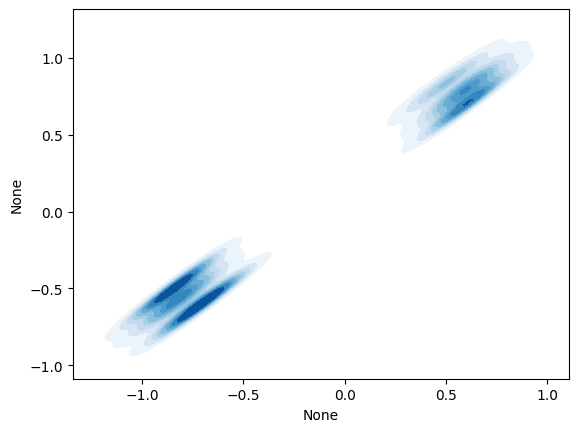

In [10]:
sns.kdeplot(x= posterior_samples[:, 0], y=posterior_samples[:, 1], fill=True, cmap="Blues", levels=10)

In [12]:
from sbibm.metrics import c2st
reference_samples = task.get_reference_posterior_samples(num_observation=1)
print("Reference samples shape:", reference_samples.shape)
print("Posterior samples shape:", posterior_samples.shape)
c2st_accuracy = c2st(reference_samples, posterior_samples)
print(f"C2ST accuracy: {c2st_accuracy}")

Reference samples shape: torch.Size([10000, 2])
Posterior samples shape: torch.Size([10000, 2])
C2ST accuracy: tensor([0.5574])


In [18]:
import pandas as pd
observation

tensor([[-0.6397,  0.1623]])

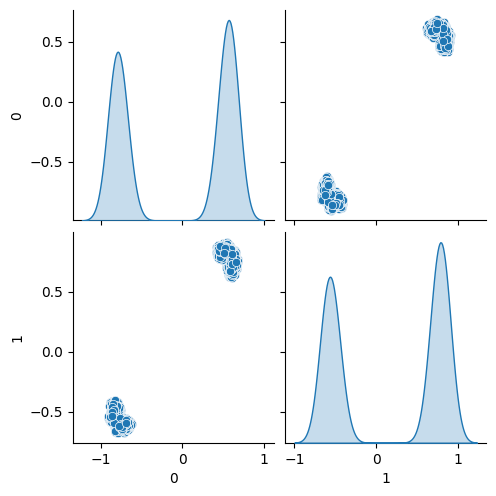

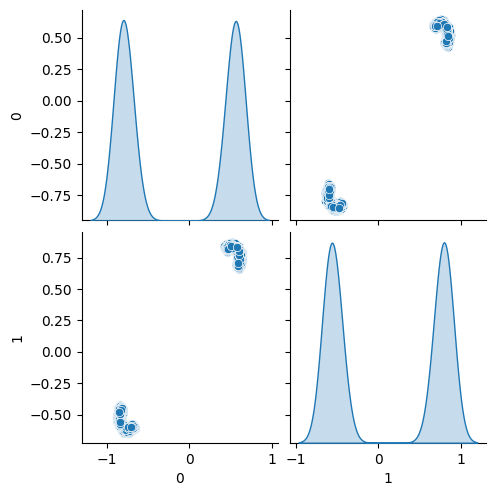

In [17]:
sns.pairplot(pd.DataFrame(posterior_samples), diag_kind="kde")
sns.pairplot(pd.DataFrame(reference_samples), diag_kind="kde")
plt.show()

In [19]:
from sbibm.visualisation import fig_posterior
fig = fig_posterior(task_name="two_moons", observation=1, samples=[posterior_samples])  

AttributeError: 'list' object has no attribute 'items'

In [20]:
from sbibm.visualisation import fig_metric
results_df = sbibm.get_results(dataset="main_paper.csv")
fig = fig_metric(results_df.query("task == 'two_moons'"), metric="C2ST")

In [ ]:
pip install future

  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import sbibm
task = sbibm.get_task("slcp")

prior = task.get_prior()
simulator = task.get_simulator()

thetas = prior(num_samples=100)
xs = simulator(thetas)


In [23]:
observation = task.get_observation(num_observation=1)
print("Y_obs shape:", observation.shape)
reference_samples = task.get_reference_posterior_samples(num_observation=1)
print("Reference samples shape:", reference_samples.shape)

Y_obs shape: torch.Size([1, 8])
Reference samples shape: torch.Size([10000, 5])


In [24]:
import torch
from sbibm.metrics.c2st import c2st
from sbibm.algorithms import rej_abc

reference_samples = task.get_reference_posterior_samples(num_observation=1)
algorithm_samples, _, _ = rej_abc(task=task, num_samples=10_000, num_simulations=100_000, num_observation=1)
c2st_accuracy = c2st(reference_samples, algorithm_samples)

Running REJ-ABC


Running 100000 simulations.:   0%|          | 0/100000 [00:00<?, ?it/s]

In [25]:
from sbibm.visualisation import fig_metric

results_df = sbibm.get_results(dataset="main_paper.csv")
results_subset = results_df.query("task == 'two_moons'")
fig = fig_metric(results_subset, metric="C2ST")  # Use fig.show() or fig.save() to show or save the figure

In [26]:
from sbibm.visualisation import fig_posterior
fig = fig_posterior(task_name="two_moons", observation=1, samples=[algorithm_samples])

AttributeError: 'list' object has no attribute 'items'